# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal
import matplotlib.image as mpimg
import os
import cv2

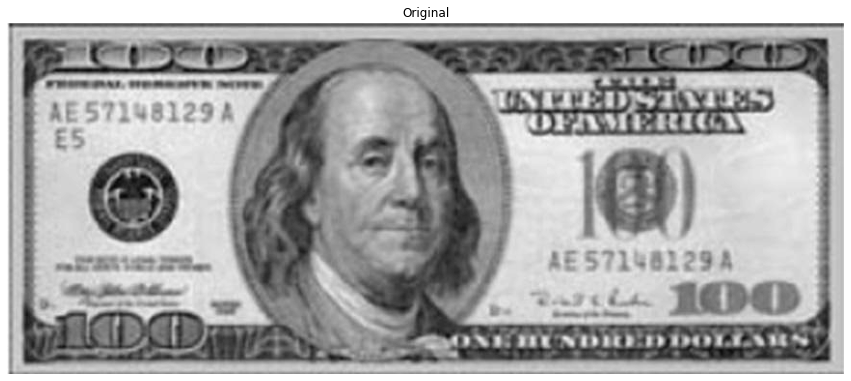

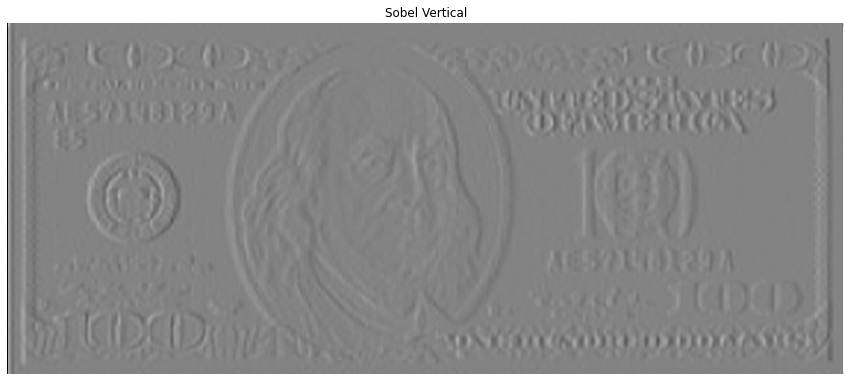

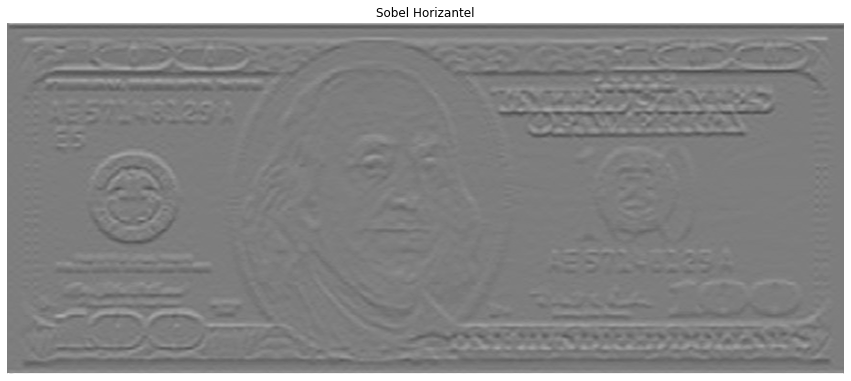

C:\Users\ahmed\AppData\Local\Temp/ipykernel_10248/3619393581.py:45: RuntimeWarning: divide by zero encountered in true_divide
  phase = np.arctan(sobel_y/sobel_x)
C:\Users\ahmed\AppData\Local\Temp/ipykernel_10248/3619393581.py:45: RuntimeWarning: invalid value encountered in true_divide
  phase = np.arctan(sobel_y/sobel_x)


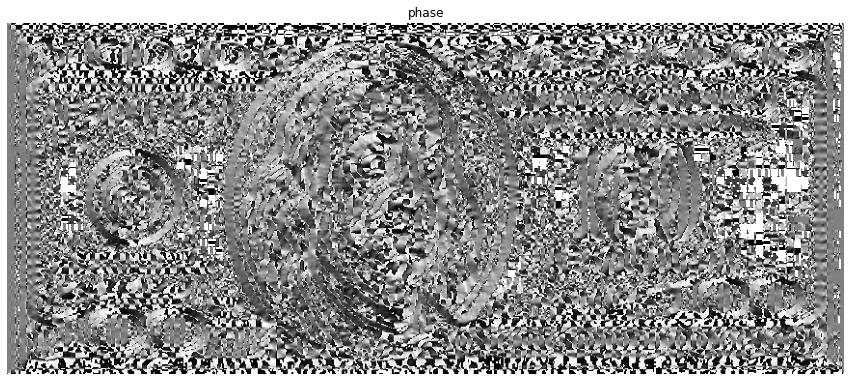

Magnitude Matrix:
 [[949.1153776  831.24124056 681.81522424 ... 610.20979999 632.34958686
  737.58660508]
 [829.70958775 347.6118525  348.12928633 ... 279.40293485 284.62255708
  662.94645334]
 [785.00573246 387.16404792 332.52067605 ...  91.13725912 130.87398519
  549.07194428]
 ...
 [866.2309161  265.34505837 223.94642216 ...  97.04638066 114.28035702
  785.30758305]
 [846.2363736  290.20337696 247.52373624 ...  91.00549434 109.04127659
  738.95331382]
 [937.67051783 868.46301015 731.11968924 ... 724.         741.5551227
  781.21059901]]


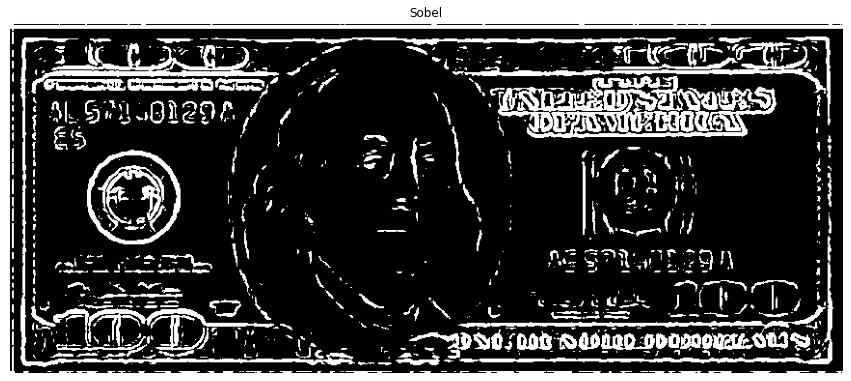

In [2]:
f = np.array(Image.open("images/note.png"))

plt.figure(figsize=(15,7))
plt.imshow(f, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.show()

filter_gx_sobel = np.array([
    [-1.0, 0.0, 1.0],
    [-2.0, 0.0, 2.0],
    [-1.0, 0.0, 1.0],
])

filter_gy_sobel = np.array([
    [-1.0,-2.0,-1.0],
    [ 0.0, 0.0, 0.0],
    [ 1.0, 2.0, 1.0],
])


sobel_x = []
sobel_y = []

sobel_x = scipy.signal.convolve2d(f, filter_gx_sobel, mode='same')
sobel_y = scipy.signal.convolve2d(f, filter_gy_sobel, mode='same')

plt.figure(figsize=(15,7))
plt.imshow(sobel_x,cmap='gray')
plt.title("Sobel Vertical")
plt.axis("off")
plt.show()

plt.figure(figsize=(15,7))
plt.imshow(sobel_y,cmap='gray')
plt.title("Sobel Horizantel")
plt.axis("off")
plt.show()

sobelmag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

sobelmag_max = np.max(sobelmag)
threshold = 0.1 * sobelmag_max #calculate threshold value

phase = np.arctan(sobel_y/sobel_x)

plt.figure(figsize=(15,7))
plt.imshow(phase, cmap='gray')
plt.title("phase")
plt.axis("off")
plt.show()

print("Magnitude Matrix:\n",sobelmag)

h,w = sobelmag.shape
for i in range(0,h):
    for j in range(0,w):
        if(sobelmag[i][j]>=threshold):
            sobelmag[i][j]=255.0
        else:
            sobelmag[i][j]=0


plt.figure(figsize=(15,7))

plt.imshow(sobelmag, cmap='gray')
plt.title("Sobel")
plt.axis("off")
plt.show()

In [3]:
print("Magnitude Matrix:\n",sobelmag)
print("\n\nPhase Matrix\n",phase)

Magnitude Matrix:
 [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ...   0. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ...   0. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


Phase Matrix
 [[ 0.80476981 -1.33894793 -1.35499088 ... -1.54457283  1.4678232
  -0.73936545]
 [-0.08083916  0.43662716  0.74882911 ...  1.5170846  -1.23793512
   0.30171507]
 [ 0.00382164  0.07756428  0.23987295 ...  1.51590646 -0.67712757
   0.10583023]
 ...
 [-0.02309058  0.15895297  0.29915553 ...  1.53987835 -0.9973558
   0.09181276]
 [-0.02363626  0.14871956  0.27829966 ...  1.55980776 -0.95481121
   0.0894347 ]
 [-0.84123131  1.30515022  1.30790319 ...  1.57079633 -1.5060222
   0.8234233 ]]


# Apply edge linking

<Figure size 432x288 with 0 Axes>

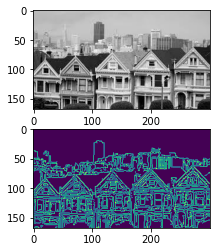

In [4]:
frame = cv2.imread('images/SanFrancisco.jpg')

# calling the designed function for finding edges
canny_img = cv2.Canny(frame,100,200)

# Displaying the input and output image
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)

# Apply Edge linking using Hough Transform

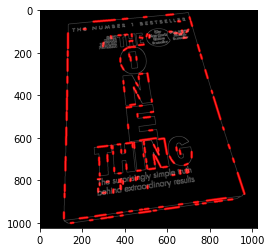

In [5]:
image = mpimg.imread('images/book.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 100
high_threshold = 250
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)


rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 


combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
plt.show()